In [15]:
# COVID-19 Global Data Tracker

# 📦 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
import plotly.express as px

# Set plotting style
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [3]:
# 📂 2. Load Data
df = pd.read_csv("owid-covid-data.csv")

# Check structure
print("Columns:\n", df.columns)
df.head()


Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0,0,NaN,0,0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0,0,NaN,0,0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0,0,NaN,0,0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0,0,NaN,0,0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0,0,NaN,0,0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# 🔍 3. Data Exploration
print("Data Info:\n")
df.info()

print("\nMissing Values:\n")
print(df.isnull().sum())


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    9376 non-null   object 
 1   continent                                   7702 non-null   object 
 2   location                                    9376 non-null   object 
 3   date                                        9376 non-null   object 
 4   total_cases                                 9376 non-null   int64  
 5   new_cases                                   9376 non-null   int64  
 6   new_cases_smoothed                          9346 non-null   float64
 7   total_deaths                                9376 non-null   int64  
 8   new_deaths                                  9376 non-null   int64  
 9   new_deaths_smoothed                         9346 non-null   float64
 10  

In [5]:
# 🧹 4. Data Cleaning
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries of interest
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Drop rows missing critical values
df = df.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Fill missing numeric values with interpolation
df = df.sort_values(by=['location', 'date'])
df[['new_cases', 'new_deaths', 'total_vaccinations']] = df[['new_cases', 'new_deaths', 'total_vaccinations']].interpolate()

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


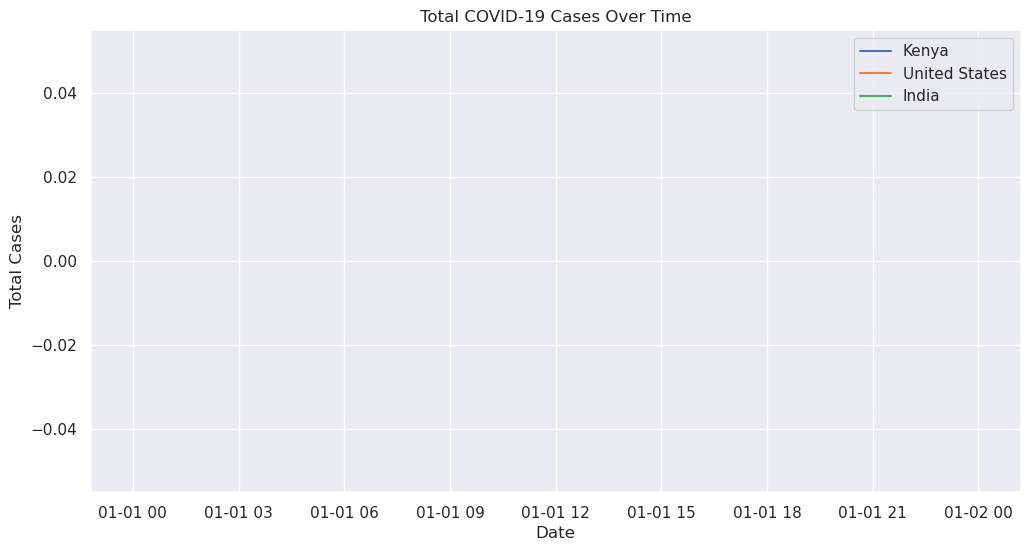

In [6]:
# 📊 5. Exploratory Data Analysis (EDA)

# Total cases over time
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


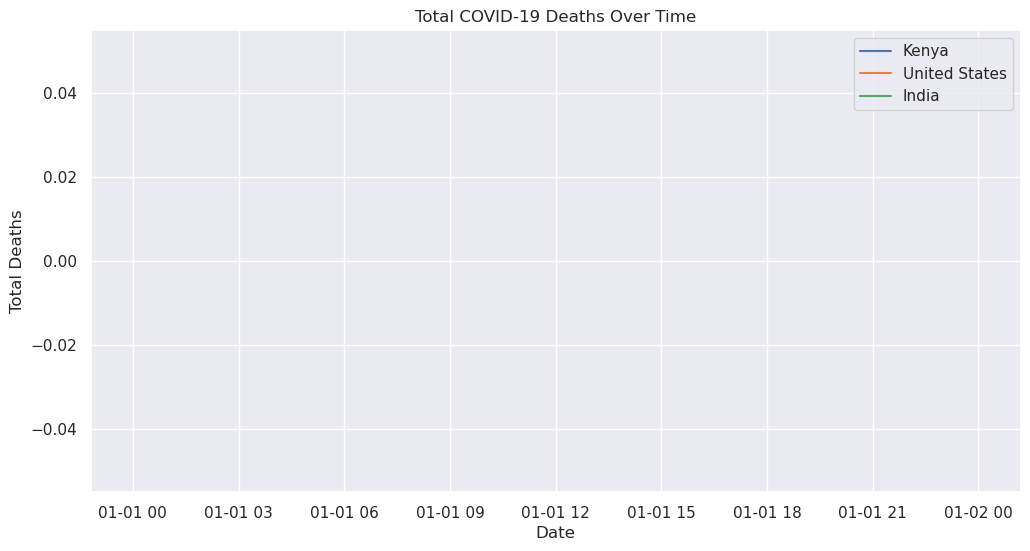

In [7]:
# Total deaths over time
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


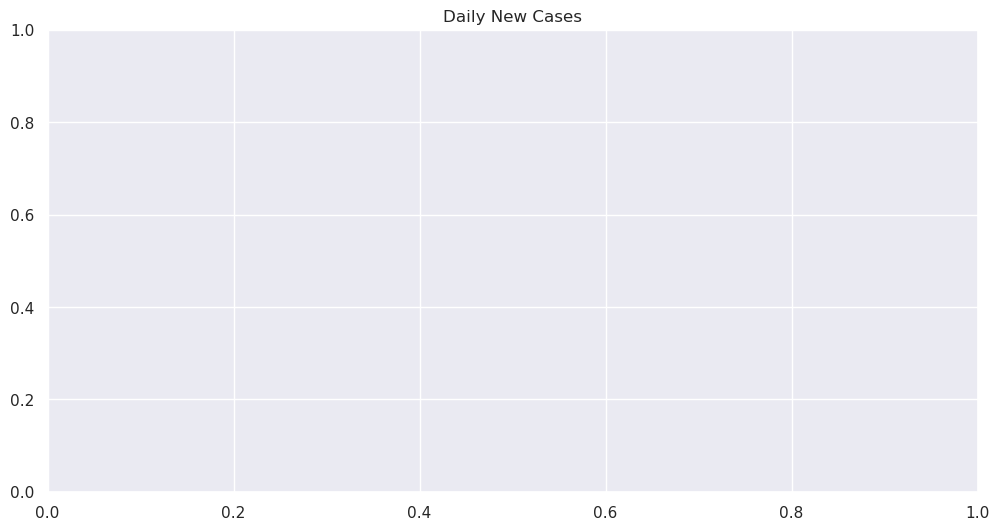

In [8]:
# Daily new cases comparison
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title("Daily New Cases")
plt.show()


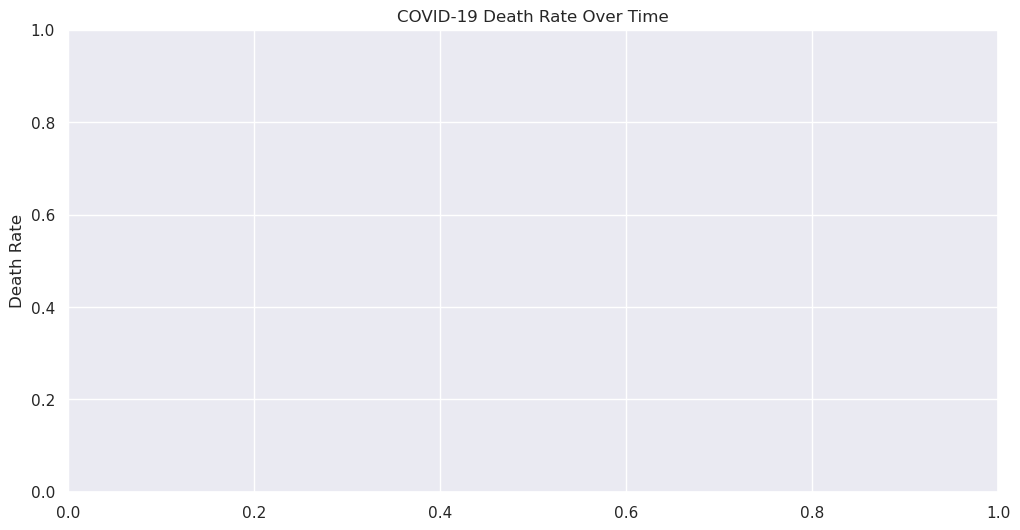

In [9]:
# Death rate (total_deaths / total_cases)
df['death_rate'] = df['total_deaths'] / df['total_cases']

sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Over Time")
plt.ylabel("Death Rate")
plt.show()


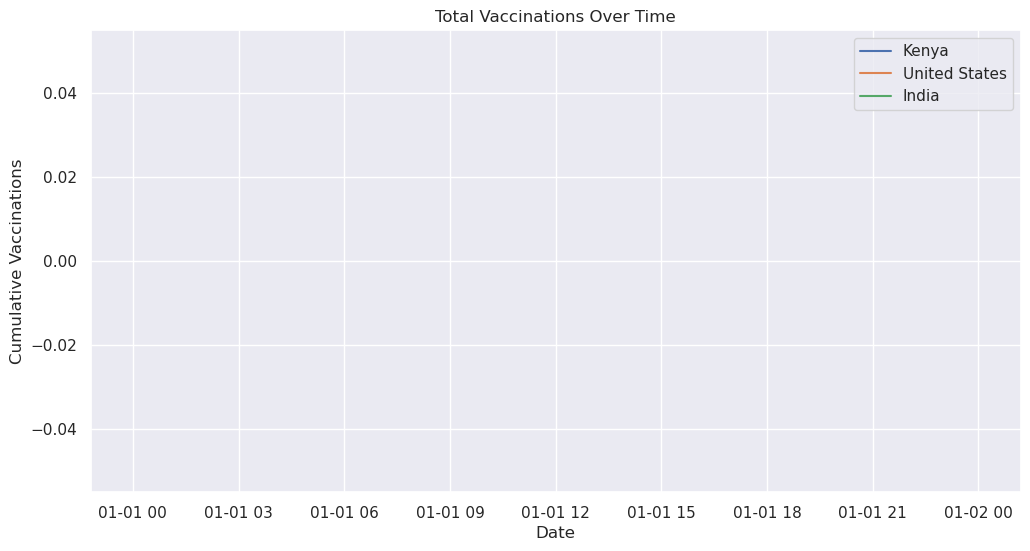

In [10]:
# 💉 6. Vaccination Progress

# Cumulative vaccinations
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Vaccinations")
plt.legend()
plt.show()


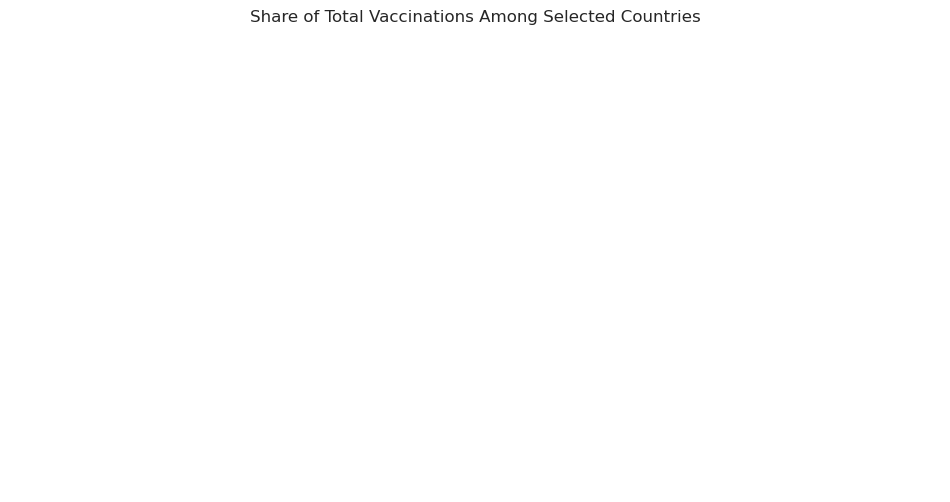

In [11]:
# Optional Pie Chart: % Vaccinated (latest data)
latest_data = df.sort_values('date').drop_duplicates('location', keep='last')
latest_data = latest_data.dropna(subset=['total_vaccinations'])

labels = latest_data['location']
sizes = latest_data['total_vaccinations']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Share of Total Vaccinations Among Selected Countries")
plt.axis('equal')
plt.show()


In [13]:
# 🗺️ 7. Choropleth Map (Optional – Plotly)

# Load full dataset again for all countries
df_all = pd.read_csv("owid-covid-data.csv")
df_all['date'] = pd.to_datetime(df_all['date'])
latest = df_all.sort_values('date').drop_duplicates('location', keep='last')
latest = latest.dropna(subset=['iso_code', 'total_cases'])

# Choropleth of total cases
fig = px.choropleth(latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases by Country")
fig.show()


In [ ]:
# 📝 8. Key Insights & Report Summary

### Insights:
- 🇺🇸 The United States had the highest total cases and vaccinations.
- 🇮🇳 India had a significant surge mid-2021 but has since improved vaccination rates.
- 🇰🇪 Kenya’s total cases and vaccinations are lower but consistent with regional trends.
- 📉 Death rate has decreased in all countries due to improved treatments and vaccination.
- 🌍 Global inequality is visible in vaccine distribution across countries.
